###### 3_pca_dim_reduction.ipynb

## 주성분 분석 (PCA. Principal Component Analysis)
- 머신러닝의 비지도 학습 기법 중 하나인 차원 축소 알고리즘
- 데이터의 포함된 중요한 정보는 최대한 유지하면서, 데이터의 차원을 줄여 분석과 학습을 효율적으로 만듬
- 원리
  - 데이터의 변동성이 가장 큰 방향을 찾고, 그 방향을 기준으로 새 좌표(주성분)를 만듦
  - 이 새로운 축에 원본 데이터를 투영하여 더 적은 수의 차원으로 변환함

원본 : (100, 3)
PCA 후 : (100, 2)


Text(0.5, 1.0, 'PCA 후 데이터 (2D)')

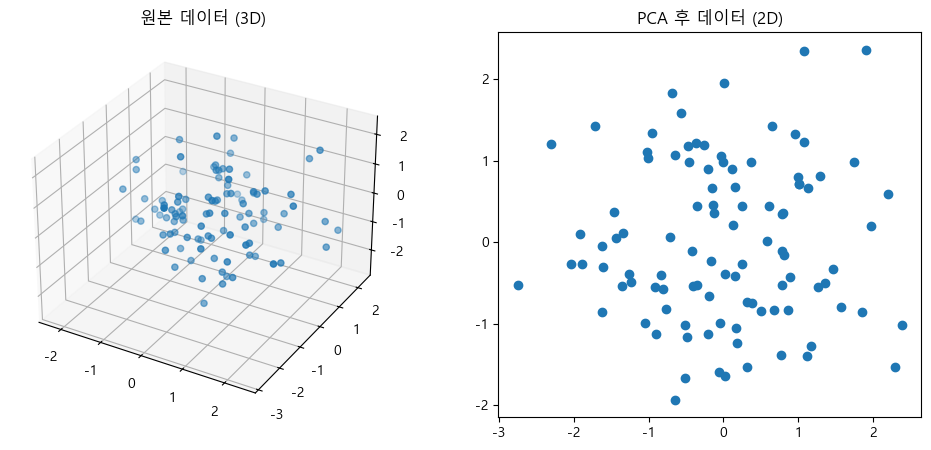

In [6]:
# 3차원 데이터 생성 
import numpy as np

np.random.seed(0)          # 시드 0으로 설정
x = np.random.randn(100, 3)    # 3차원으로 100개 데이터 생성
x.shape
# => 넘파이 관점에서는 2차원 배열
# => 머신러닝에서 "차원"은 데이터 한 개가 가지는 특성(feature)을 의미함!
#    각 행은 "하나의 점", 그 점을 표현하는 속성이 3개라면 --> (x,y,z) 즉, 3차원 공간의 점!

# PCA(주성분분석)로 2차원으로 축소
# (100, 3) --> (100, 2)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)     # n_components : 축소할 차원수. 주성분 수.

x_pca = pca.fit_transform(x)  # 데이터 x 차원 축소

print(f'원본 : {x.shape}')
print(f'PCA 후 : {x_pca.shape}')

# 시각화
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# plt.figure(figsize=(12,5))
fig = plt.figure(figsize=(12,5))

# * 원본 데이터
# plt.subplot(1, 2, 1)
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plt.scatter(x[:, 0], x[:, 1], x[:, 2])
ax.scatter(x[:, 0], x[:, 1], x[:, 2])
# plt.title("원본 데이터")
ax.set_title("원본 데이터 (3D)")

# * 축소 후 데이터
plt.subplot(1, 2, 2)
plt.scatter(x_pca[:, 0], x_pca[:, 1])
plt.title("PCA 후 데이터 (2D)")

원본 데이터의 형태 : (150, 4)
PCA 후 데이터 형태 : (150, 2)
각 주성분의 분산 비율 : [0.92461872 0.05306648]
주성분 분산 비율 합 : 0.9776852063187963


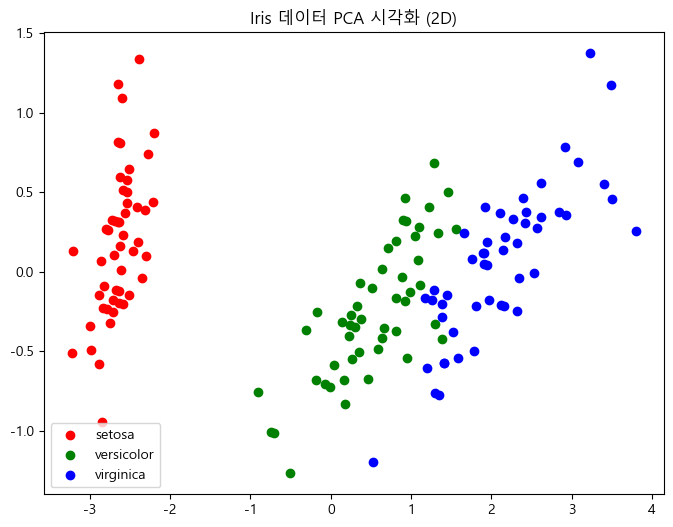

In [ ]:
# Iris 데이터 불러오기
from sklearn.datasets import load_iris

iris = load_iris()

x = iris.data     # Feature
y = iris.target   # 품종(0,1,2)
target_names = iris.target_names    # 품종명

print(f'원본 데이터의 형태 : {x.shape}')
# => (150, 4) : 150개의 4차원 데이터(특징 4개)

# PCA (4D -> 2D)
pca = PCA(n_components=2) 
# n_components 지정하지 않을 경우 모든 구성 요소 유지
# 2 지정 시 가장 중요한 주성분 두 개만 남겨 2차원으로 변환
# -> 데이터의 분산이 가장 큰 방향부터 새로운 축을 생성하여
#    그 축을 기준으로 데이터를 다시 표현

x_pca = pca.fit_transform(x)

print(f'PCA 후 데이터 형태 : {x_pca.shape}')

# 시각화
plt.figure(figsize=(8,6))
colors = ['r', 'g', 'b']  # 그래프에서 표시할 색상 목록

for c, i, target in zip(colors, [0,1,2], target_names):
  plt.scatter(x_pca[y == i, 0], 
              x_pca[y == i, 1], 
              color=c,
              label=target)

plt.legend()
plt.title("Iris 데이터 PCA 시각화 (2D)")


# 분산 비율 확인
print(f"각 주성분의 분산 비율 : {pca.explained_variance_ratio_}")
print(f'주성분 분산 비율 합 : {sum(pca.explained_variance_ratio_)}')
# 각 주성분의 분산 비율 : [0.92461872 0.05306648]
# => 각 주성분이 데이터 전체 분산에서 차지하는 비율

# 주성분 분산 비율 합 : 0.9776852063187963
# => 합계가 97%로 데이터 손실이 매우 적은 편임!

데이터 형태 : (1797, 64)


Text(0.5, 1.0, 'Digits PCA')

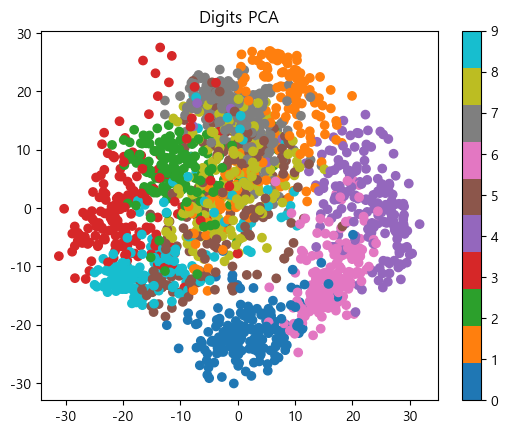

In [17]:
from sklearn.datasets import load_digits

# 데이터 불러오기
digits = load_digits()
x = digits.data
y = digits.target

# 데이터 형태 확인
print(f'데이터 형태 : {x.shape}')
# (1797, 64) => 1797 행(데이터 개수), 64 열(Feature) -> 64차원 데이터

# 2차원으로 축소
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
# * fit : PCA 기준축(주성분) 학습
# * transform : 원본 데이터를 주성분 기준 좌표로 변환

# print(x)
# print(x_pca)

# 시각화
sct = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='tab10')
plt.colorbar(sct, ticks=list(set(y)))

plt.title('Digits PCA')

wine datasets : (178, 13)
PCA 2D - 각 주성분 분산 비율 : [0.99809123 0.00173592]
PCA 2d - 분산 비율 합 : 0.9998271461166032
PCA 3D - 각 주성분 분산 비율 : [9.98091230e-01 1.73591562e-03 9.49589576e-05]
PCA 3D - 주성분 분산 합 : 0.9999221050741546


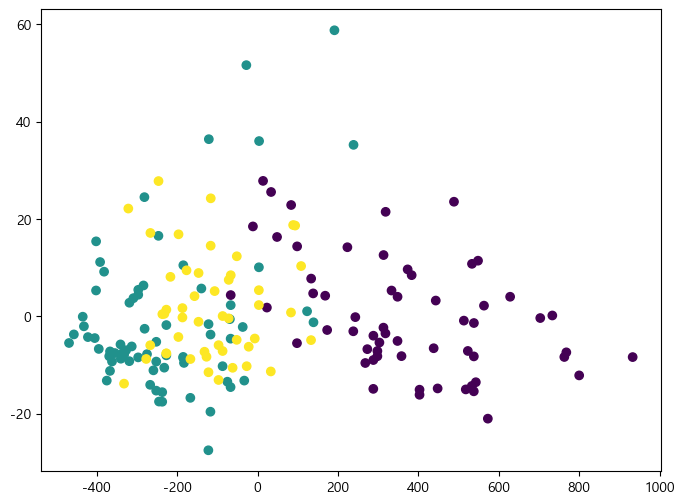

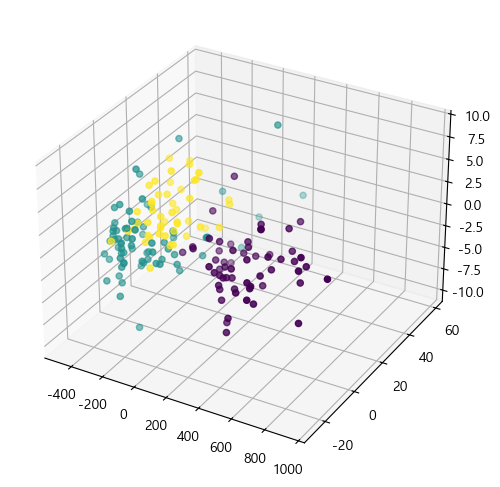

In [23]:
# Wine Dataset
from sklearn.datasets import load_wine

# 데이터 불러오기
wine = load_wine()
x = wine.data       # Feature
y = wine.target     # label

print(f'wine datasets : {x.shape}')

# [1] 2차원으로 차원 축소
pca_2d = PCA(n_components=2)
x_pca_2d = pca_2d.fit_transform(x)

#     + 시각화, 분산 비율 확인
plt.figure(figsize=(8,6))
plt.scatter(x_pca_2d[:, 0], x_pca_2d[:, 1], c=y)

print(f'PCA 2D - 각 주성분 분산 비율 : {pca_2d.explained_variance_ratio_}')
print(f'PCA 2d - 분산 비율 합 : {sum(pca_2d.explained_variance_ratio_)}')

# [2] 3차원으로 차원 축소
pca_3d = PCA(n_components=3)
x_pca_3d = pca_3d.fit_transform(x)

#     + 시각화, 분산 비율 확인
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(x_pca_3d[:, 0], x_pca_3d[:, 1], x_pca_3d[:, 2], c=y)

print(f'PCA 3D - 각 주성분 분산 비율 : {pca_3d.explained_variance_ratio_}')
print(f'PCA 3D - 주성분 분산 합 : {sum(pca_3d.explained_variance_ratio_)}')

In [ ]:
# 전체 주성분(차원)으로 PCA 수행
pca = PCA()
pca.fit(x)
# 주성분 계산만 수행

# * 누적 분산 비율 확인
#   ndarray.cumsum() : 누적 합을 리스트(배열)형태로 반환
cum_variances = pca.explained_variance_ratio_.cumsum()
print(f'누적 분산 비율 : {cum_variances}')

# * 90% 이상 분산을 설명한다는 최소 주성분 개수 확인
components_90 = (cum_variances >= 0.9).argmax() + 1
print(f'90% 이상 분산 설명 가능한 주성분 개수 : {components_90}')


누적 분산 비율 : [0.99809123 0.99982715 0.99992211 0.99997232 0.99998469 0.99999315
 0.99999596 0.99999748 0.99999861 0.99999933 0.99999971 0.99999992
 1.        ]
90% 이상 분산 설명 가능한 주성분 개수 : 1
